In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games=pd.read_excel('Games.xlsx')
games.head()

,GameID,GameTitle,Genre,ReleaseDate,Developer
0,1,Right-sized human-resource forecast,Adventure,2024-02-24,Pixel Studios
1,2,Optional tertiary frame,Simulation,2021-11-02,StarGame Studios
2,3,Team-oriented static standardization,Simulation,2022-08-16,Pixel Studios
3,4,Inverse mobile database,Strategy,2024-03-15,Sunrise Interactive
4,5,Inverse mission-critical array,Adventure,2022-05-08,Pixel Studios


In [3]:
game_sale=pd.read_excel('game_sales.xlsx')
game_sale.head()

,GameID,Platform,SalesRegion,UnitsSold,Price
0,1,Xbox,North America,861216,45.39
1,2,PlayStation,North America,444626,53.55
2,3,PlayStation,North America,569637,34.20
3,4,PlayStation,South America,977779,43.90
4,5,PC,South America,473349,21.61


## MERGING BOTH FILES

In [5]:
df=pd.merge(games,game_sale,on='GameID')
df.head()

,GameID,GameTitle,Genre,ReleaseDate,Developer,Platform,SalesRegion,UnitsSold,Price
0,1,Right-sized human-resource forecast,Adventure,2024-02-24,Pixel Studios,Xbox,North America,861216,45.39
1,2,Optional tertiary frame,Simulation,2021-11-02,StarGame Studios,PlayStation,North America,444626,53.55
2,3,Team-oriented static standardization,Simulation,2022-08-16,Pixel Studios,PlayStation,North America,569637,34.20
3,4,Inverse mobile database,Strategy,2024-03-15,Sunrise Interactive,PlayStation,South America,977779,43.90
4,5,Inverse mission-critical array,Adventure,2022-05-08,Pixel Studios,PC,South America,473349,21.61


# DATA CLEANING

In [7]:
# NULL VALUES COLUMNS WISE 
df.isnull().sum()

GameID         0
GameTitle      0
Genre          0
ReleaseDate    0
Developer      0
Platform       0
SalesRegion    0
UnitsSold      0
Price          0
dtype: int64

In [8]:
# NULL VALUES ROW WISE
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [9]:
# REMOVING MISSING VALUES
df.dropna().head()

,GameID,GameTitle,Genre,ReleaseDate,Developer,Platform,SalesRegion,UnitsSold,Price
0,1,Right-sized human-resource forecast,Adventure,2024-02-24,Pixel Studios,Xbox,North America,861216,45.39
1,2,Optional tertiary frame,Simulation,2021-11-02,StarGame Studios,PlayStation,North America,444626,53.55
2,3,Team-oriented static standardization,Simulation,2022-08-16,Pixel Studios,PlayStation,North America,569637,34.20
3,4,Inverse mobile database,Strategy,2024-03-15,Sunrise Interactive,PlayStation,South America,977779,43.90
4,5,Inverse mission-critical array,Adventure,2022-05-08,Pixel Studios,PC,South America,473349,21.61


In [10]:
# DATA TYPES
df.dtypes

GameID                  int64
GameTitle              object
Genre                  object
ReleaseDate    datetime64[ns]
Developer              object
Platform               object
SalesRegion            object
UnitsSold               int64
Price                 float64
dtype: object

# DATA VISUALIZATION:

# 1: Top 5 game genres by total sales:

In [24]:
df['sales']=(df['UnitsSold']*df['Price']).round(1)

In [26]:
genre_by_total_sale=df.groupby('Genre')['sales'].sum().reset_index()

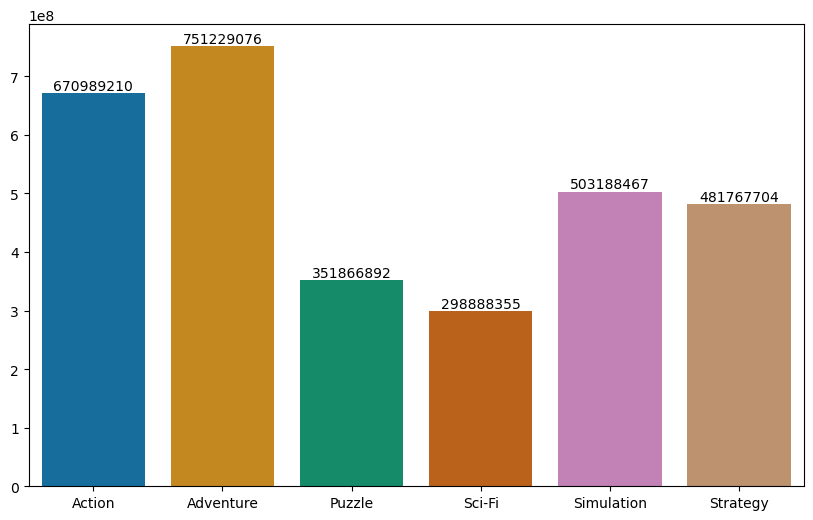

In [28]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=genre_by_total_sale,x='Genre',y='sales',hue='Genre',palette='colorblind')
plot.set(xlabel=None, ylabel=None)
for label in plot.patches:
    height=label.get_height()
    plot.text(label.get_x()+label.get_width()/2,height,str(int(height)),ha='center',va='bottom')
plt.show()

# 2: Total revenue by sales region:

In [31]:
revenue_by_sales_and_region=df.groupby(['SalesRegion'])['sales'].sum().reset_index()

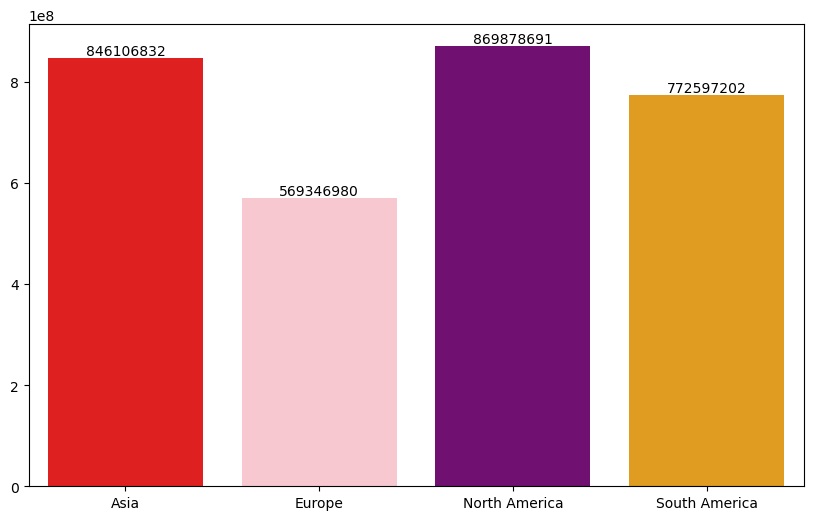

In [35]:
plt.figure(figsize=(10,6))
color=['red','pink','purple','orange']
plot=sns.barplot(data=revenue_by_sales_and_region,x='SalesRegion',y='sales',hue='SalesRegion',palette=color)
plot.set(xlabel=None, ylabel=None)
for label in plot.patches:
    height=label.get_height()
    plot.text(label.get_x()+label.get_width()/2,height,str(int(height)),ha='center',va='bottom')


# 3: Sales trends over game release dates:

In [137]:
df['year']=pd.to_datetime(df['ReleaseDate']).dt.year

In [139]:
df['year'] = df['year'].astype(int)

In [141]:
sale_by_year=df.groupby('year')['sales'].sum().reset_index()

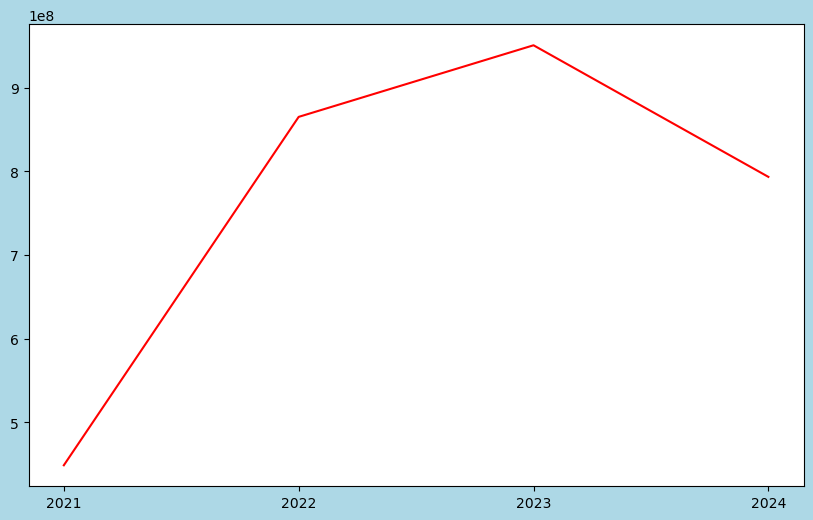

In [151]:
from matplotlib.ticker import MaxNLocator              # it control ticks on your plot axis mainly force integer only value in axis
plt.figure(figsize=(10,6),facecolor='lightblue')
line=sns.lineplot(data=sale_by_year,x='year',y='sales',color='red')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
line.set(xlabel=None, ylabel=None)
plt.show()

# 3: Correlation between price, units sold, and revenue:

In [160]:
correlation=df[['Price','UnitsSold','sales']].corr()

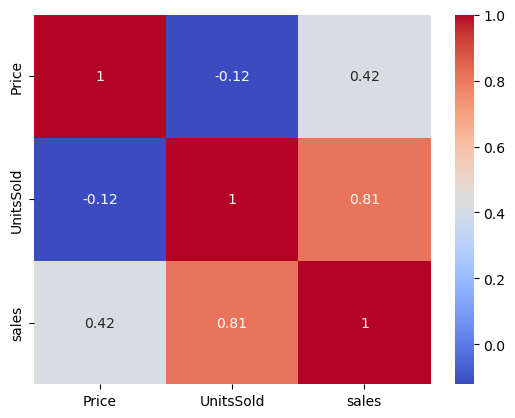

In [162]:
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

# 4: Plateform-wise number of games released:

In [193]:
count_games=df['Platform'].value_counts()

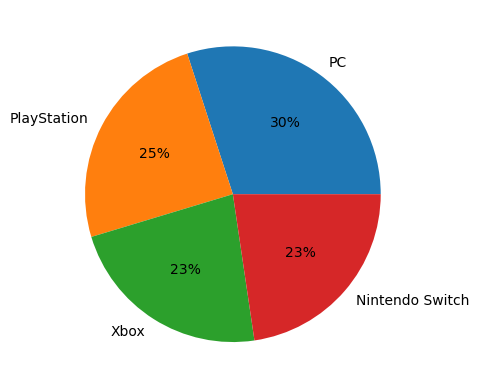

In [195]:
plt.pie(count_games.values,labels=count_games.index,autopct='%1.0f%%')
plt.show()

# 5: Relationship between price and units sold:

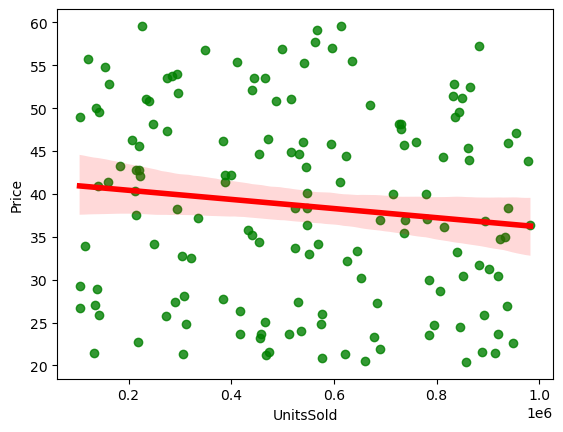

In [212]:
sns.regplot(data=df,x='UnitsSold',y='Price',color='green',line_kws={'color':'red','linewidth':4})
plt.show()